In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.xmargin'] = 0

# Chapter 4 exercise

## Question 1

Using the `eulerf` function that was defined in the notes:

In [2]:
def eulerf(F,X0,tRange,h=1e-3,**kwargs):
  tmin,tmax=tRange
  stop=tmax+2*h    
  t = np.arange(tmin,stop,h)    #stop value is not included

  X0 = np.array([X0]).flatten() #make x0 a 1D array
  n=len(t); m=len(X0)           #get number of values
  X=np.empty([n,m]); X[0]=X0    #form output array

  for k in range(n-1):
    t1,X1=t[k],X[k]             #labels introduced for convenience
    X2=X1+h*F(t1,X1,**kwargs)   #Euler forward difference 
    X[k+1]=X2
  
  return t,X

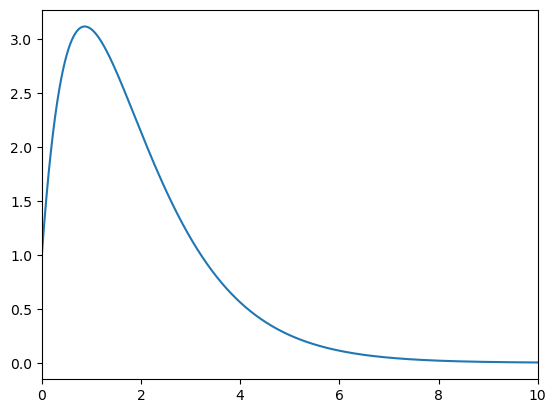

In [3]:
def dxdt(t,x):
    return -x+np.exp(-(t-2))

t,x = eulerf(dxdt,1,[0,10])
plt.plot(t,x)
plt.show()

If you wish to compare, the analytic solution is given by

\begin{equation*}
x=t e^{-(t-2)}+e^{-t}
\end{equation*}

## Question 2

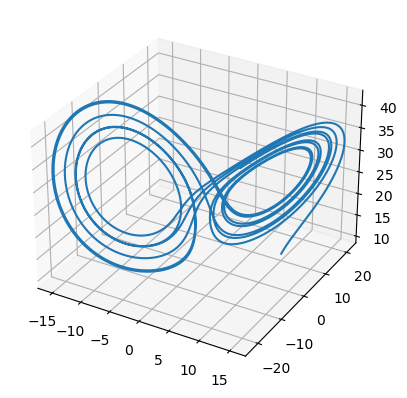

In [4]:
def dxdt(t,X,p,s,b):
    x,y,z=X
    dxdt=s*(y-x)
    dydt=x*(p-z)-y
    dzdt=x*y-b*z
    return np.array([dxdt,dydt,dzdt])

X0=[10,10,10]
t,X = eulerf(dxdt,X0,[0,10],p=28,s=10,b=2.667)

x,y,z=X.T #Extract the columns as variables

ax = plt.figure().add_subplot(projection='3d')
ax.plot(x, y, z)
plt.show()

## Question 3

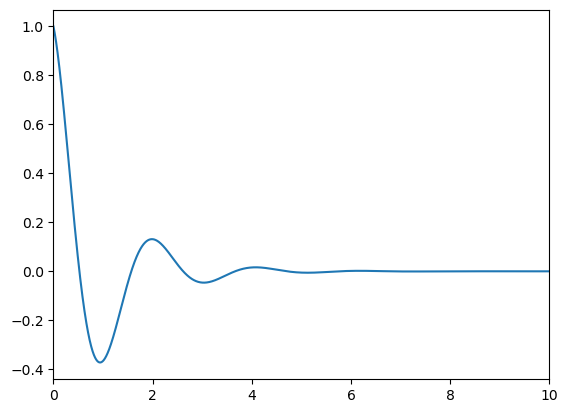

In [5]:
def dxdt(t,X):
    x,y=X
    dxdt=y
    dydt=-2*y-10*x
    return np.array([dxdt,dydt])

X0=[1,-1]
t,X = eulerf(dxdt,X0,[0,10])

plt.plot(t,X[:,0])
plt.show()